In [2]:
import pandas as pd
df = pd.read_csv('RQ2  and RQ3  - final.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'RQ2  and RQ3  - final.csv'

In [86]:
target = df['RQ2 target'].value_counts()
target

RQ2 target
blog post                476
tutorial or article      446
software homepage        293
404                      217
API documentation        159
repository               150
other                    117
application               71
code                      66
organization homepage     36
Q&A thread                26
specification             21
personal homepage         10
book content               9
stack overflow             6
bug report                 5
licence                    5
research paper             4
forum thread               2
Name: count, dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     2119 non-null   int64 
 1   strata         2119 non-null   object
 2   Domain         2119 non-null   object
 3   text           2119 non-null   object
 4   Extract_links  2119 non-null   object
 5   Link           2119 non-null   object
 6   RQ2 target     2119 non-null   object
 7   RQ3 perpose    2119 non-null   object
 8   RQ- category   2119 non-null   object
dtypes: int64(1), object(8)
memory usage: 149.1+ KB


In [88]:
df.isna().sum()

Unnamed: 0       0
strata           0
Domain           0
text             0
Extract_links    0
Link             0
RQ2 target       0
RQ3 perpose      0
RQ- category     0
dtype: int64

In [89]:
perpose = df['RQ3 perpose'].value_counts()
perpose

RQ3 perpose
providing context      913
elaborating            451
suggesting solution    303
clarifying             255
other                  197
Name: count, dtype: int64

In [90]:
category = df['RQ- category'].value_counts()
category

RQ- category
notification          920
package management    653
other                 412
community related     134
Name: count, dtype: int64

In [91]:
strt = df['strata'].value_counts()
strt

strata
common       707
sometimes    706
rare         706
Name: count, dtype: int64

In [92]:
pivot_table = df.pivot_table(index='RQ2 target', columns='strata', aggfunc='size', fill_value=0)

pivot_table['frequency'] = pivot_table.sum(axis=1)

pivot_table.rename(columns={'common': 'common', 'sometimes': 'sometimes','rare':'rare'}, inplace=True)

pivot_table.reset_index(inplace=True)

pivot_table = pivot_table[['RQ2 target', 'frequency', 'common', 'sometimes','rare']]

print(pivot_table)


strata             RQ2 target  frequency  common  sometimes  rare
0                         404        217      33         88    96
1           API documentation        159     103         27    29
2                  Q&A thread         26      20          3     3
3                 application         71       0         51    20
4                   blog post        476     288         96    92
5                book content          9       0          2     7
6                  bug report          5       3          1     1
7                        code         66      16         31    19
8                forum thread          2       0          1     1
9                     licence          5       0          0     5
10      organization homepage         36       5          9    22
11                      other        117      22         43    52
12          personal homepage         10       0          5     5
13                 repository        150     143          6     1
14        

In [93]:
pivot_table = df.pivot_table(index='RQ3 perpose', columns='strata', aggfunc='size', fill_value=0)

pivot_table['frequency'] = pivot_table.sum(axis=1)

pivot_table.rename(columns={'common': 'common', 'sometimes': 'sometimes','rare':'rare'}, inplace=True)

pivot_table.reset_index(inplace=True)

pivot_table = pivot_table[['RQ3 perpose', 'frequency', 'common', 'sometimes','rare']]

print(pivot_table)

strata          RQ3 perpose  frequency  common  sometimes  rare
0                clarifying        255      78         96    81
1               elaborating        451     151        136   164
2                     other        197      81         65    51
3         providing context        913     294        314   305
4       suggesting solution        303     103         95   105


In [94]:
pivot_table = df.pivot_table(index='RQ- category', columns='strata', aggfunc='size', fill_value=0)

pivot_table['frequency'] = pivot_table.sum(axis=1)

pivot_table.rename(columns={'common': 'common', 'sometimes': 'sometimes','rare':'rare'}, inplace=True)

pivot_table.reset_index(inplace=True)

pivot_table = pivot_table[['RQ- category', 'frequency', 'common', 'sometimes','rare']]

print(pivot_table)

strata        RQ- category  frequency  common  sometimes  rare
0        community related        134      58         40    36
1             notification        920     333        288   299
2                    other        412     125        152   135
3       package management        653     191        226   236


RQ- category
notification          920
package management    653
other                 412
community related     134
Name: count, dtype: int64


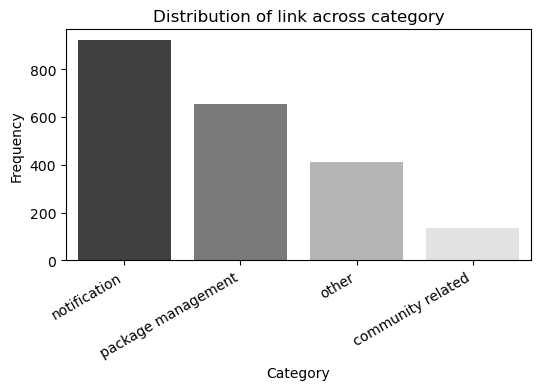

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
cat_counts = df['RQ- category'].value_counts()
print(cat_counts)

plt.figure(figsize=(6, 3))
sns.barplot(x=cat_counts.index, y=cat_counts.values, palette = 'Greys_r')
plt.title('Distribution of link across category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=30, ha='right')
plt.show()

In [96]:
import pandas as pd

# Load the data from the CSV file
file_path = '/mnt/data/Domain_count.csv'
df = pd.read_csv('Domain_count.csv')

# Display the first few rows of the dataframe
df.head()



,Unnamed: 0,Domain,Count
0,1274,twitter.com,4885
1,526,github.com,4327
2,1533,www.npmjs.com,2247
3,159,blog.npmjs.org,519
4,779,medium.com,384


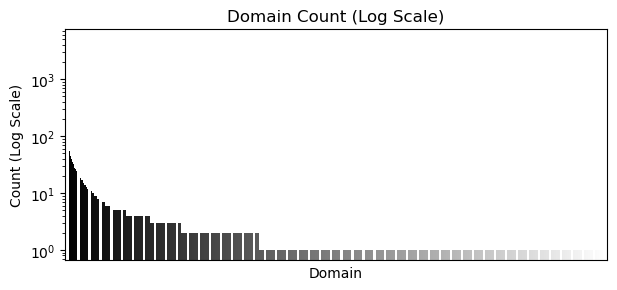

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the domain count field with log scale
plt.figure(figsize=(7, 3))
sns.barplot(data=df, x='Domain', y='Count', palette='gray')
plt.yscale('log')
plt.title('Domain Count (Log Scale)')
plt.xlabel('Domain')
plt.ylabel('Count (Log Scale)')
plt.xticks([])

plt.show()


In [98]:
import requests

url = "http://42pixels.com"

try:
    response = requests.head(url)
    print(f"Status Code: {response.status_code}")
except requests.exceptions.RequestException as e:
    print(f"Error: {e}")

Status Code: 404


In [99]:
# Create a new column to categorize domains
def categorize_domain(count):
    if count > 49:
        return 'Common'
    elif count > 9:
        return 'Sometimes'
    else:
        return 'Rare'

df['Category'] = df['Count'].apply(categorize_domain)



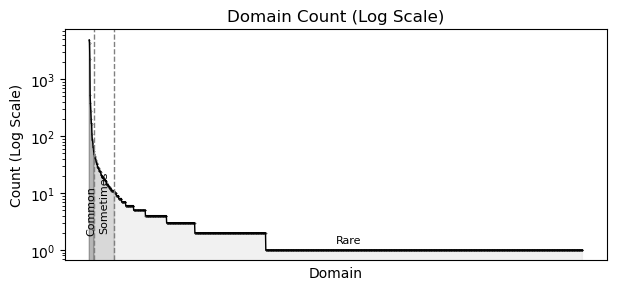

In [100]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_sorted is already defined as per your sorting logic

# Plotting the domain count field as a line with points and log scale
plt.figure(figsize=(7, 3))
plt.plot(df_sorted['Domain'], df_sorted['Count'], marker='.', linestyle='solid', color='black', linewidth=1, markersize=0.4)
plt.yscale('log')
plt.title('Domain Count (Log Scale)')
plt.xlabel('Domain')
plt.ylabel('Count (Log Scale)')
plt.xticks([])  # Hides the x-ticks



# Calculate the positions for the categories
common_threshold = df_sorted[df_sorted['Count'] > 50].index[-1]
sometimes_threshold = df_sorted[df_sorted['Count'] > 10].index[-1]

# Add vertical lines at thresholds
plt.axvline(x=common_threshold, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=sometimes_threshold, color='gray', linestyle='--', linewidth=1)

# Define colors for common, sometimes, and rare
color_common = '#101010'
color_sometimes = '#808080'
color_rare = 'lightgray'

# Plotting each category with different colors
plt.fill_between(df_sorted.index[:common_threshold + 1], df_sorted['Count'].iloc[:common_threshold + 1], color=color_common, alpha=0.3)
plt.fill_between(df_sorted.index[common_threshold + 1:sometimes_threshold + 1], df_sorted['Count'].iloc[common_threshold + 1:sometimes_threshold + 1], color=color_sometimes, alpha=0.3)
plt.fill_between(df_sorted.index[sometimes_threshold + 1:], df_sorted['Count'].iloc[sometimes_threshold + 1:], color=color_rare, alpha=0.3)

# Annotate the sections
plt.text(common_threshold / 2, 5, 'Common', fontsize=8, ha='center', va='center',rotation=90)
plt.text((sometimes_threshold + common_threshold) / 2, 2, 'Sometimes', fontsize=8, ha='center', va='bottom',rotation=90)
plt.text((sometimes_threshold + len(df_sorted)) / 2, 1.2, 'Rare', fontsize=8, ha='center', va='bottom')

plt.show()
